In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
from scipy import misc
%matplotlib inline
print("ok")

ok


In [18]:
url="https://raw.githubusercontent.com/epfml/ML_course/master/labs/ex08/template/faithful.csv"
train=pd.read_csv(url,sep=" ",names=['colA','colB'])

#to see properly all the columns
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

train=train.to_numpy()
train
train.shape

(272, 2)

In [0]:
def plot_image_compression(original_image, image, assignments, mu, k):
    """plot histgram."""
    # init the plot
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(original_image, cmap='Greys_r')

    # visualization
    image_reconstruct = mu[assignments]
    # image_reconstruct = np.squeeze(image_reconstruct, axis=1)
    image_reconstruct = image_reconstruct.astype('uint8').reshape(original_image.shape)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(image_reconstruct, cmap='Greys_r')
    plt.draw()
    plt.pause(0.1)

    # ax3 = fig.add_subplot(2, 1, 2)

    # predifine colors
    # colors = np.array(
    #     [[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 1], [0, 1, 1],
    #      [0.1, 0.1, 0.1], [1, 0.5, 0], [0, 0.5, 0], [0.5, 0.5, 0.5],
    #      [0.5, 0.25, 0], [0.5, 0, 0.5], [0, 0.5, 1], [1, 0, 0],
    #      [0, 1, 0], [0, 0, 1], [1, 0, 1], [0, 1, 1], [0.1, 0.1, 0.1],
    #      [1, 0.5, 0], [0, 0.5, 0], [0.5, 0.5, 0.5], [0.5, 0.25, 0],
    #      [0.5, 0, 0.5], [0, 0.5, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1],
    #      [1, 0, 1], [0, 1, 1], [0.1, 0.1, 0.1],
    #      [1, 0.5, 0], [0, 0.5, 0], [0.5, 0.5, 0.5], [0.5, 0.25, 0],
    #      [0.5, 0, 0.5], [0, 0.5, 1]])
    #
    # for k_th in range(k):
    #     rows, cols = np.where(assignments == k_th)
    #     hists, bins = np.histogram(image[rows], bins=10)
    #     width = 0.7 * (bins[1] - bins[0])
    #     center = (bins[:-1] + bins[1:]) / 2
    #     ax3.bar(center, hists, align='center', width=width,
    #             color=colors[k_th, :])
    #     ax3.plot(mu[k_th], 1, 'o', color=colors[k_th, :],
    #              linewidth=2, markersize=12, markerfacecolor=[1, 1, 1])
    # ax3.set_xlabel("x")
    # ax3.set_ylabel("y")
    # ax3.set_title("Histogram of clustered pixels.")
    plt.tight_layout()
    plt.savefig("image_compression")
    plt.show()

In [0]:
def load_image(path):
    """use the scipy.misc to load the image."""
    return plt.imread(path)

In [0]:

def normalize_data(data):
  mean_x=np.mean(data)
  std_x=np.std(data)
  
  data=(data-mean_x)/std_x
  
  return data
  

In [0]:
def transform_data(data):
  tx=np.c_[np.ones(data.shape[0]),data]
  return tx

In [0]:

def plot_cluster(data, mu, colors, ax):
    """plot the cluster.
    Note that the dimension of the column vector `colors`
    should be the same as the number of clusters.
    """
   
    # check if the dimension matches.
    assert(len(colors) >= mu.shape[0])
    # build distance matrix.
    distance_matrix = build_distance_matrix(data, mu)
    # get the assignments for each point.
    assignments = np.argmin(distance_matrix, axis=1)
  
    for k_th in range(mu.shape[0]):
        rows= np.where(assignments == k_th)[0]
        data_of_kth_cluster = data[rows, :]
        
  
        
        ax.scatter(
            data_of_kth_cluster[:, 0],
            data_of_kth_cluster[:, 1],
            s=40, c=colors[k_th])
    ax.grid()
    ax.set_xlabel("x")
    ax.set_ylabel("y")


def plot(data, mu, mu_old, out_dir):
    """plot."""
    colors = ['red', 'blue', 'green',"yellow","orange"]
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    plot_cluster(data, mu_old, colors, ax1)
    ax1.scatter(mu_old[:, 0], mu_old[:, 1],
                facecolors='none', edgecolors='y', s=80)

    ax2 = fig.add_subplot(1, 2, 2)
    plot_cluster(data, mu, colors, ax2)
    ax2.scatter(mu[:, 0], mu[:, 1],
                facecolors='none', edgecolors='y', s=80)

    # matplotlib.rc('xtick', labelsize=5)
    # matplotlib.rc('ytick', labelsize=5)

    plt.tight_layout()
    plt.savefig(out_dir)
    plt.show()
    plt.close()


def plot_image_compression(original_image, image, assignments, mu, k):
    """plot histgram."""
    # init the plot
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(original_image, cmap='Greys_r')

    # visualization
    image_reconstruct = mu[assignments]
    # image_reconstruct = np.squeeze(image_reconstruct, axis=1)
    image_reconstruct = image_reconstruct.astype('uint8').reshape(original_image.shape)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(image_reconstruct, cmap='Greys_r')
    plt.draw()
    plt.pause(0.1)

    # ax3 = fig.add_subplot(2, 1, 2)

    # predifine colors
    # colors = np.array(
    #     [[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 1], [0, 1, 1],
    #      [0.1, 0.1, 0.1], [1, 0.5, 0], [0, 0.5, 0], [0.5, 0.5, 0.5],
    #      [0.5, 0.25, 0], [0.5, 0, 0.5], [0, 0.5, 1], [1, 0, 0],
    #      [0, 1, 0], [0, 0, 1], [1, 0, 1], [0, 1, 1], [0.1, 0.1, 0.1],
    #      [1, 0.5, 0], [0, 0.5, 0], [0.5, 0.5, 0.5], [0.5, 0.25, 0],
    #      [0.5, 0, 0.5], [0, 0.5, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1],
    #      [1, 0, 1], [0, 1, 1], [0.1, 0.1, 0.1],
    #      [1, 0.5, 0], [0, 0.5, 0], [0.5, 0.5, 0.5], [0.5, 0.25, 0],
    #      [0.5, 0, 0.5], [0, 0.5, 1]])
    #
    # for k_th in range(k):
    #     rows, cols = np.where(assignments == k_th)
    #     hists, bins = np.histogram(image[rows], bins=10)
    #     width = 0.7 * (bins[1] - bins[0])
    #     center = (bins[:-1] + bins[1:]) / 2
    #     ax3.bar(center, hists, align='center', width=width,
    #             color=colors[k_th, :])
    #     ax3.plot(mu[k_th], 1, 'o', color=colors[k_th, :],
    #              linewidth=2, markersize=12, markerfacecolor=[1, 1, 1])
    # ax3.set_xlabel("x")
    # ax3.set_ylabel("y")
    # ax3.set_title("Histogram of clustered pixels.")
    plt.tight_layout()
    plt.savefig("image_compression")
    plt.show()

In [0]:

def build_dir(dir):
    """build a new dir. if it exists, remove it and build a new one."""
    if os.path.exists(dir):
        shutil.rmtree(dir)
    os.makedirs(dir)


**Exercice 1: Implementing K-means algorithm**

In [0]:
def initialize_clusters(data,k):
  #initialize the k clusters center, means , randomly. it will return an np array of k points
  #data has to be a numpy array
  clusters_index=[]
  for i in range(k):
    n=np.random.randint(data.shape[0])
    clusters_index.append(n)
  return (data[clusters_index])
  

In [26]:
print(initialize_clusters(train,3))

[[ 3.6 79. ]
 [ 5.1 96. ]
 [ 4.6 85. ]]


In [0]:
def build_distance_matrix(data,mu):
  # the distance matrix has the data point for rows and distance to centers for columns, mu being the centers
  matrix=[]
  for x in data:
    row=[]
    for center in mu:
      row.append((x-center).dot(x-center))
    matrix.append(row)
    
  return np.array(matrix)
      
    
  

In [28]:
matrix=build_distance_matrix(train,initialize_clusters(train,3))
print(matrix.shape)
print(matrix[:5])


(272, 3)
[[6.26399489e+02 6.41600000e+01 8.44003289e+02]
 [3.80689000e-01 2.93840000e+02 1.60044890e+01]
 [4.00839056e+02 9.44488900e+00 5.78149156e+02]
 [6.40179560e+01 8.39480890e+01 1.44173056e+02]
 [9.65477456e+02 1.96284089e+02 1.23210756e+03]]


In [0]:
def update_kmeans_parameters(data,mu_old):
  
  #create assignements
  z_matrix=[]
  distance_matrix=build_distance_matrix(data,mu_old)
  for row in distance_matrix:
    z_n=np.zeros(mu_old.shape[0])
    z_n[np.where(row==min(row))]=1
    z_matrix.append(z_n)
    
  z_matrix=np.array(z_matrix)
  mu=[]
  
  # Now we have the optimal assignement, we can calculate the new centers
  for k, center in enumerate(mu_old):
    sum_x=0
    sum_z=0
    for n, x_n in enumerate(data):
      sum_x+=z_matrix[n][k]*x_n
      sum_z+=z_matrix[n][k]
      
    mu.append(sum_x/sum_z)
  mu=np.array(mu)

  #recreate assignements
  z_matrix=[]
  distance_matrix=build_distance_matrix(data,mu)
  loss=0
  for row in distance_matrix:
    z_n=np.zeros(mu.shape[0])
    z_n[np.where(row==min(row))]=1
    z_matrix.append(z_n)
    
    loss+=min(row)
    
  z_matrix=np.array(z_matrix)
  assignments = np.argmin(distance_matrix, axis=1)
  
  
 
  return loss,assignments,mu
  
    
  
 
  

The current iteration of k-means is: 0,                the average loss is 3389.2584254883586.


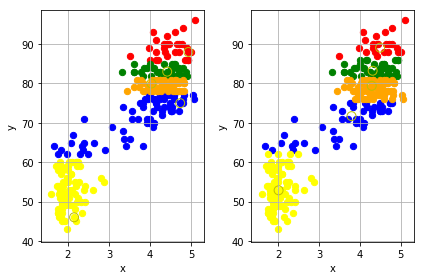

The current iteration of k-means is: 1,                the average loss is 3123.0270638823217.


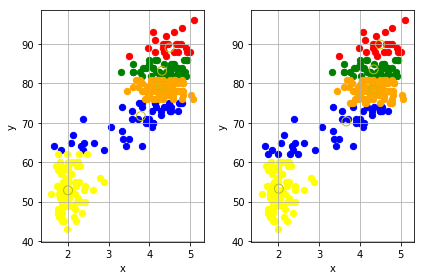

The current iteration of k-means is: 2,                the average loss is 2893.104283096578.


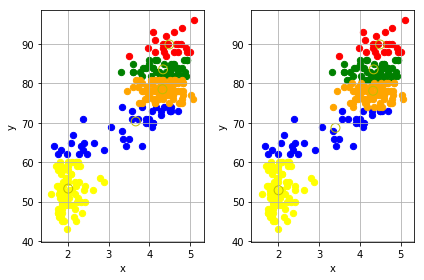

The current iteration of k-means is: 3,                the average loss is 2724.1439125070547.


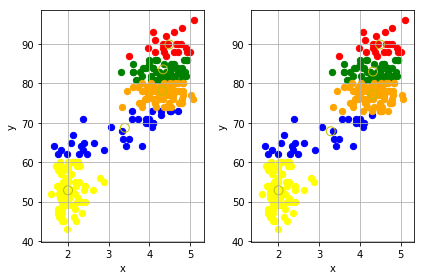

The current iteration of k-means is: 4,                the average loss is 2621.455832021064.


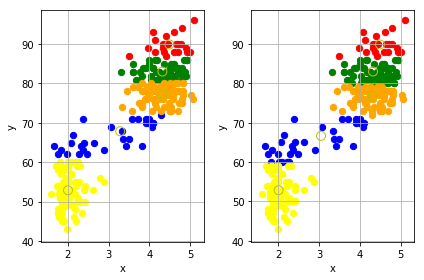

The current iteration of k-means is: 5,                the average loss is 2479.143839369334.


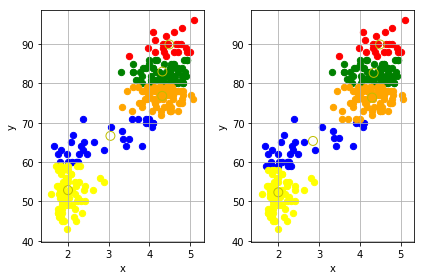

The current iteration of k-means is: 6,                the average loss is 2238.171141682074.


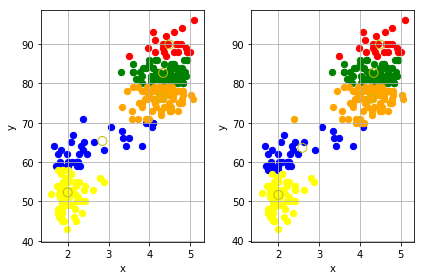

The current iteration of k-means is: 7,                the average loss is 2105.022237076501.


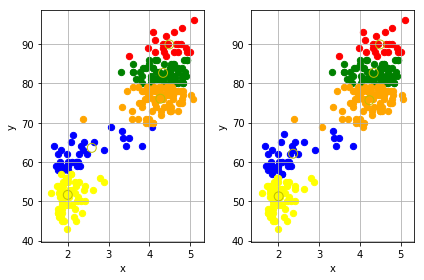

The current iteration of k-means is: 8,                the average loss is 2075.3876202518522.


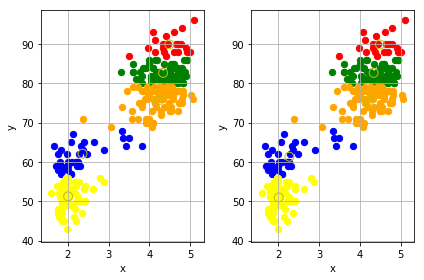

The current iteration of k-means is: 9,                the average loss is 2075.3876202518522.


In [30]:
def kmeans(data, k, max_iters, threshold):
  
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(train, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(train, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 5
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(train, k, max_iters, threshold)

In [33]:

image_path = "/content/mandrill.png"    # upload image and copy path here
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=float32.


In [34]:

def preprocess_image(original_image):
    """preprocess the image."""
    processed_image = original_image.reshape(
        (original_image.shape[0] * original_image.shape[1], 3))
    print(processed_image)
    processed_image = processed_image.astype(float)
    print(
        "Current image: the shape of image={s}, the data type={dt}.".format(
            s=processed_image.shape, dt=processed_image.dtype))
    
    return processed_image

processed_image = preprocess_image(original_image)

[[0.6156863  0.57254905 0.27450982]
 [0.2509804  0.20392157 0.10196079]
 [0.28627452 0.18431373 0.04705882]
 ...
 [0.02352941 0.04313726 0.03137255]
 [0.02745098 0.03137255 0.01960784]
 [0.02745098 0.02745098 0.01960784]]
Current image: the shape of image=(230400, 3), the data type=float64.


The current iteration of kmeans is: 0, the average loss is 7852.882735760673.


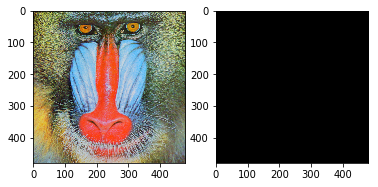

<Figure size 432x288 with 0 Axes>

In [35]:
def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    mu_old = initialize_clusters(processed_image, k)
    
    # init some empty lists to store the result.
    loss_list = []
    
    # start the kmeans
    for iter in range(max_iter):
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)

        if iter % 10 == 0:
            print(
                "The current iteration of kmeans is: {i}, the average loss is {l}.".format(
                    i=iter, l=average_loss))
        
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break

        # update mu
        mu_old = mu
        
    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 10
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)